# physics724: Advanced Methods of Data Analysis

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". Remember to delete the `raise NotImplementedError()` statements as you implement your solutions.

---

# Exercise 3.2: Estimating efficiencies

Consider the problem of estimating the efficiency $\epsilon$ of selecting $k$ objects from a sample of size $n$.

Treating the selection as a *Bernoulli process* and applying Bayes' theorem, we can obtain a general expression for the posterior PDF for the efficiency (see the lecture notes):

$$
p_n(\epsilon,k) = \frac{p_n(k,\epsilon)\cdot p(\epsilon)}{\int_0^1 p_n(k,\epsilon)\cdot p(\epsilon) d\epsilon}
$$

where 

$$
p_n(k,\epsilon) =
\begin{pmatrix}
n\\k
\end{pmatrix}
\epsilon^k \cdot (1-\epsilon)^{n-k}
= \frac{n!}{k!(n-k)!} \epsilon^k \cdot (1-\epsilon)^{n-k}
$$

In this exercise we will explore the impact of using the Beta distribution as the prior:
$$
p(\epsilon) = \beta(\epsilon,\frac12,\frac12) \propto \epsilon^{-\frac12} \cdot (1-\epsilon)^{-\frac12}
$$

1) Implement functions to evaluate the posterior PDF for the efficiency using:

a) the flat prior  
b) the Beta distribution prior

*Hint*: you can ignore the denominator (*i.e.* normalisation) of the PDF, so there is no need to perform the integral by hand.

In [ ]:
# For the function n choose k, you can use scipy.special.comb
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html
from scipy.special import comb
import numpy as np

def flat_prior(e,n,k):
    prior = 1
    posterior = comb(n,k)*(e**k)*((1-e)**(n-k)) * prior
    return posterior

def beta_prior(e,n,k):
    like = comb(n,k)*(e**k)*((1-e)**(n-k))
    try:
        prior = e**(-0.5) * ((1-e)**(-0.5))
    except ZeroDivisionError:
        prior = 0
    posterior = like * prior
    return posterior


2) Plot the two functions for $k=7$ and $n=10$, ideally overlaid

In [ ]:
# https://matplotlib.org/tutorials/introductory/pyplot.html

from scipy.integrate import quad as integrate
# To compare the shapes of the PDFs by overlaying them, it is usedful to normalise them.
# To normalise the functions, you can take a numerical integral using scipy.integrate.quad.
# Say you want to integrate a function f(x,k,n) with respect to x from 0 to 1:
#
# from scipy.integrate import quad as integrate
# integral = integrate(lambda x: f(x, k, n), 0, 1)
n,k = 10,7
flat_norm = round(integrate(lambda e: flat_prior(e,n,k), 0, 1)[0],3)
beta_norm = round(integrate(lambda e: beta_prior(e,n,k), 0, 1)[0],3)
print(flat_norm)
print(beta_norm)
e = np.linspace(0,1,500)
flat = flat_prior(e,n,k)/flat_norm
beta = beta_prior(e,n,k)/beta_norm


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(15,6))
ax = fig.add_subplot(111)
ax.plot(e,flat,label='flat prior')
ax.plot(e,beta,label = 'beta prior')
ax.set_xlabel('Efficiency')
ax.set_ylabel('Probability')
ax.set_title('Posterior PDF n=10, k= 7')
plt.legend()

3) The estimate of the efficiency is found by taking the mode of the posterior of the distribution, and the uncertainties on that estimate are found by constructing the smallest 68% interval around the mode (*i.e.* the confidence interval).

a) Find the expectation value and uncertainties for $\varepsilon$ for $k=7$ and $n=10$ using the flat and beta-function priors.  
b) How does this compare when you increase the sample size to $n=100$ and $n=1000$ while keeping the same true value of $\epsilon=0.7$?

**NB**: the uncertainties are generally asymmetric

I have tried to work for n = 10 and obtain the assymetric uncertainities but evidently my code doesn't work. For n = 100, 1000, the distribution tends to gaussian and we can calculate the uncertainities easily.

In [ ]:

flat_e = e[np.argmax(flat)]
beta_e = e[np.argmax(beta)]
l_b ,r_b= e,e
lintervals_flat = []
rintervals_flat = []
dintervals_flat = []
lintervals_beta = []
rintervals_beta = []
dintervals_beta = []
for i in l_b:
    if i<flat_e:
        for j in r_b:
            if  flat_e <j :
                i68_flat = round(integrate(lambda x:flat_prior(x,n,k),i,j)[0],5)
                if i68_flat - 0.68*flat_norm < 0.001:
                    lintervals_flat.append(i)
                    rintervals_flat.append(j)
                    dintervals_flat.append(j-i)
    if i<beta_e:
        for j in r_b:
            if beta_e <j :
                i68_beta = round(integrate(lambda x:flat_prior(x,n,k),i,j)[0],5)
                if i68_beta- 0.68*flat_norm < 0.001:
                    lintervals_beta.append(i)
                    rintervals_beta.append(j)
                    dintervals_beta.append(j-i)

In [ ]:

f_min = np.argmin(intervals_flat[2])
b_min = np.argmin(intervals_beta[2])
ci_flat = [intervals_flat[0][f_min],intervals_flat[1][f_min]]
ci_beta = [intervals_beta[0][b_min],intervals_beta[1][b_min]]

In [ ]:
print('pdf with a flat a priori has mode = %s  -%s   +%s'%(flat_e,ci_flat[0],ci_flat[1]))
print('pdf with a fbeta distributiona priori has mode = %s  -%s   +%s'%(fbetae,ci_fbeta0],ci_fbeta1])))

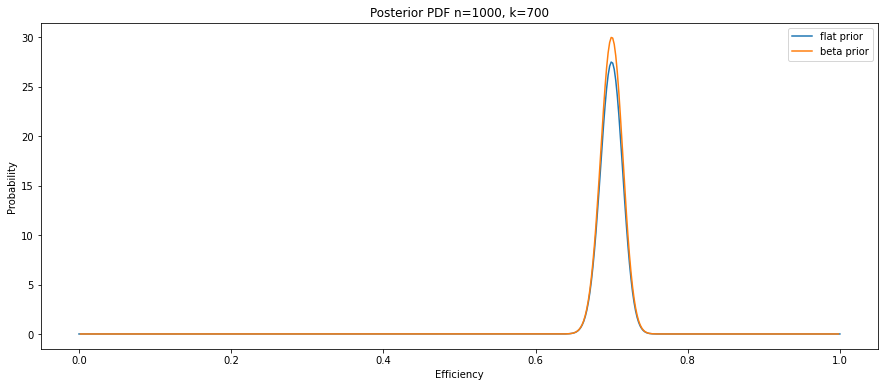

In [75]:
n,k = 1000,700
flat_norm = round(integrate(lambda e: flat_prior(e,n,k), 0, 1)[0],3)
beta_norm = round(integrate(lambda e: beta_prior(e,n,k), 0, 1)[0],3)
e = np.linspace(0,1,500)
flat = flat_prior(e,n,k)/flat_norm
beta = beta_prior(e,n,k)/beta_norm
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(15,6))
ax = fig.add_subplot(111)
ax.plot(e,flat,label='flat prior')
ax.plot(e,beta,label = 'beta prior')
ax.set_xlabel('Efficiency')
ax.set_ylabel('Probability')
ax.set_title('Posterior PDF n=%s, k=%s'%(n,k))
plt.legend()